# Example: Kasted

In [1]:
import mpslib as mps
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt
pv.set_plot_theme("document")
#pv.global_theme.jupyter_backend = 'panel'  # use this in jupyter lab
pv.global_theme.jupyter_backend = 'pythreejs' # use this in notebook

## Get the training image and conditional data

In [2]:
# Get the training image
dx=100
TI, TI_fname = mps.trainingimages.kasted(dx=dx)

url_base = 'https://raw.githubusercontent.com/ergosimulation/mpslib/master/data/kasted'
remote_files=['kasted_soft_well.dat',  'kasted_soft_ele.dat',  'kasted_soft_res.dat','kasted_hard_well_consistent.dat' ]
for local_file in remote_files:
    mps.trainingimages.get_remote('%s/%s' %(url_base,local_file), local_file)
        
# Get conditional point data    
EAS_well=mps.eas.read(remote_files[0])
EAS_ele=mps.eas.read(remote_files[1])
EAS_res=mps.eas.read(remote_files[2])
EAS_well_hard=mps.eas.read(remote_files[3])


In [3]:
# Get geometry
x_pad = 4*dx
x_min = np.min(EAS_well['D'][:,0])-x_pad
x_max = np.max(EAS_well['D'][:,0])+x_pad
y_min = np.min(EAS_well['D'][:,1])-x_pad
y_max = np.max(EAS_well['D'][:,1])+x_pad
z_min = np.min(EAS_well['D'][:,2])
z_max = np.max(EAS_well['D'][:,2])
x_min = dx*np.floor(x_min/dx)
y_min = dx*np.floor(y_min/dx)
z_min = dx*np.floor(z_min/dx)

nx=np.int16(np.ceil((x_max-x_min)/dx))
ny=np.int16(np.ceil((y_max-y_min)/dx))
nz=np.max([np.int16(np.ceil((z_max-z_min)/dx)),1])

grid_cell_size = np.array([1, 1, 1])*dx
origin = np.array([x_min, y_min, z_min])



simulation_grid_size=np.array([nx, ny, nz])

print(origin)
print(grid_cell_size)
print(simulation_grid_size)


print('[%f,%f] [%f,%f] [%f,%f]' % (x_min, x_max, y_min, y_max, z_min, z_max))

[ 561300. 6225000.       0.]
[100 100 100]
[155 108   1]
[561300.000000,576787.000000] [6225000.000000,6235796.000000] [0.000000,0.000000]


In [11]:
#mps.plot.plot(TI)
informed_well_soft_data=np.where(np.abs(EAS_well['D'][:,4]-0.5)<0.05))



SyntaxError: unmatched ')' (818844038.py, line 2)

## PyVIsta plotting of conditional data

In [5]:
# Create PyVista meshes
mesh_well=pv.PolyData(EAS_well['D'][:,0:3])
mesh_well["Pv"]=EAS_well['D'][:,3]

mesh_ele=pv.PolyData(EAS_ele['D'][:,0:3])
mesh_ele["Pv"]=EAS_ele['D'][:,3]

mesh_res=pv.PolyData(EAS_res['D'][:,0:3])
mesh_res["Pv"]=EAS_res['D'][:,3]


cmap = plt.cm.get_cmap("viridis", 255)
cmap = plt.cm.get_cmap("PuOr", 255)
#from pyvistaqt import BackgroundPlotter
#l = BackgroundPlotter()
pl = pv.Plotter(shape=(1,3))
pl.subplot(0,0)
pl.add_text('P(channel|resistivity)', font_size=30) 
pl.add_mesh(mesh_res, point_size=10000, render_points_as_spheres=True, style='points', show_scalar_bar=True, cmap=cmap, clim=[0, 1])

pl.subplot(0,1)
pl.add_text('P(channel|ele)', font_size=30) 
pl.add_mesh(mesh_ele, point_size=111112, render_points_as_spheres=True, style='points', show_scalar_bar=True, cmap=cmap, clim=[0, 1])

pl.subplot(0,2)
pl.add_text('P(channel|well)', font_size=30) 
pl.add_mesh(mesh_well, point_size=111112, render_points_as_spheres=True, style='points', show_scalar_bar=True, cmap=cmap, clim=[0, 1])


pl.show_axes()
pl.show_grid()
pl.show()



GridspecLayout(children=(Renderer(camera=PerspectiveCamera(aspect=0.4444444444444444, children=(DirectionalLig…

In [6]:
# Plot all soft data 
cmap = plt.cm.get_cmap("viridis", 255)
cmap = plt.cm.get_cmap("PuOr", 255)
#from pyvistaqt import BackgroundPlotter
#l = BackgroundPlotter()
pl = pv.Plotter()
pl.add_mesh(mesh_res, point_size=10000, render_points_as_spheres=False, style='points', cmap=cmap, clim=[0, 1])
pl.add_mesh(mesh_ele, point_size=20000, render_points_as_spheres=True, style='points', cmap=cmap, clim=[0, 1])
pl.add_mesh(mesh_well, point_size=50000, render_points_as_spheres=True, style='points',cmap=cmap, clim=[0, 1])

pl.show_axes()
pl.show_grid()
pl.show()


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(intensity=0.25, positi…

# MPSlib in Kasted

## Setup and run MPSlib

In [7]:
O=mps.mpslib(method='mps_snesim_tree', verbose_level=-11, 
             simulation_grid_size=simulation_grid_size, 
             origin=origin, 
             grid_cell_size=grid_cell_size)
O.ti=TI
O.par['n_real']=50;

# Set soft data
# O.d_soft=EAS_well['D']
# Set Hard
O.d_hard=EAS_well_hard['D']

# Run MpsLib
O.delete_local_files()
#.run()
O.run_parallel();


### Plot MPSlib results

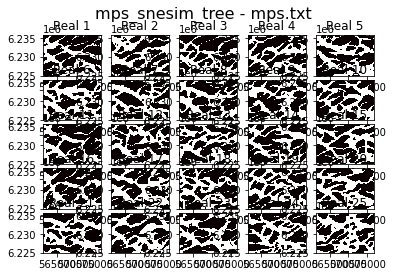

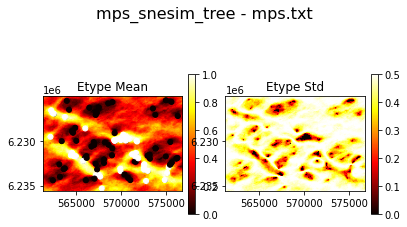

In [8]:
O.plot_reals()
O.plot_etype()


In [9]:
O.par

{'n_real': 50,
 'rseed': 1,
 'n_max_cpdf_count': 1,
 'out_folder': '.',
 'ti_fnam': 'ti.dat',
 'simulation_grid_size': array([155, 108,   1]),
 'origin': array([ 561300., 6225000.,       0.]),
 'grid_cell_size': array([100, 100, 100]),
 'mask_fnam': 'mask.dat',
 'hard_data_fnam': 'hard.dat',
 'shuffle_simulation_grid': 2,
 'entropyfactor_simulation_grid': 4,
 'shuffle_ti_grid': 1,
 'hard_data_search_radius': 1,
 'soft_data_categories': array([0, 1]),
 'soft_data_fnam': 'soft.dat',
 'n_threads': -1,
 'debug_level': -1,
 'do_estimation': 0,
 'do_entropy': 0,
 'template_size': array([8, 7, 1]),
 'n_multiple_grids': 3,
 'n_min_node_count': 0,
 'n_cond': 36}

### Estimation


In [10]:
O.par['do_estimation']=1;
O.par['do_entropy']=1;
O.par['n_real']=1
O.run()

loading entropy from ti.dat_ent_0.gslib
loading entropy from ti.dat_cg_0.gslib
loading entropy from ti.dat_cg_1.gslib


True

In [12]:
O.H


14523.8

In [26]:


mps.plot.plot(O.est[0])
plt.figure;
mps.plot.plot(O.Hcond)


/home/tmeha/miniconda3/envs/mps/lib/python3.9/site-packages/pyvista/core/dataset.py:1555: PyvistaDeprecationWarning: Use of `cell_arrays` is deprecated. Use `cell_data` instead.
  warnings.warn(


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(intensity=0.25, positi…

/home/tmeha/miniconda3/envs/mps/lib/python3.9/site-packages/pyvista/core/dataset.py:1555: PyvistaDeprecationWarning: Use of `cell_arrays` is deprecated. Use `cell_data` instead.
  warnings.warn(


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(DirectionalLight(intensity=0.25, positi…